# Plot Basis Functions
fourier, fourier_quarter, fourier_half, bessel, chebyshev, positive_chebyshev, weighted_chebyshev, weighted_positive_chebyshev, equispace_gaussian

In [347]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib

In [350]:
# Plotting settings
import matplotlib.colors as colors
import mplhep as hep
plt.style.use(hep.style.ROOT)
matplotlib.rcParams.update({'font.size': 15})


In [328]:
def fourier(basis_vals, basis_derivs, r, N, radial_hyps):
    r1 = radial_hyps[0]
    r2 = radial_hyps[1]
    c = 1 / (r2 - r1)
    x = (r - r1) * c
    fourier_factor = radial_hyps[2]

    # If r is outside the support of the radial basis set, return.
    if r < r1 or r > r2:
        return

    cos_count = 1
    sin_count = 1
    for n in range(N):
        if n == 0:
            basis_vals[n] = 1
            basis_derivs[n] = 0
        elif n % 2 == 1:
            c2 = math.pi * fourier_factor * cos_count
            basis_vals[n] = math.cos(c2 * x)
            basis_derivs[n] = -math.sin(c2 * x) * c2 * c
            cos_count += 1
        elif n % 2 == 0:
            c2 = math.pi * fourier_factor * sin_count
            basis_vals[n] = math.sin(c2 * x)
            basis_derivs[n] = math.cos(c2 * x) * c2 * c
            sin_count += 1

import math
import numpy as np

def fourier_quarter(basis_vals, basis_derivs, r, N, radial_hyps):
    r1 = radial_hyps[0]
    r2 = radial_hyps[1]
    c = 1 / (r2 - r1)
    x = (r - r1) * c

    # If r is outside the support of the radial basis set, return.
    if r < r1 or r > r2:
        return

    cos_count = 1
    sin_count = 1
    for n in range(N):
        if n == 0:
            basis_vals[n] = 1
            basis_derivs[n] = 0
        elif n % 2 == 1:
            c2 = (math.pi / 2) * cos_count
            basis_vals[n] = math.cos(c2 * x)
            basis_derivs[n] = -math.sin(c2 * x) * c2 * c
            cos_count += 1
        elif n % 2 == 0:
            c2 = (math.pi / 2) * sin_count
            basis_vals[n] = math.sin(c2 * x)
            basis_derivs[n] = math.cos(c2 * x) * c2 * c
            sin_count += 1

def fourier_half(basis_vals, basis_derivs, r, N, radial_hyps):
    r1 = radial_hyps[0]
    r2 = radial_hyps[1]
    c = 1 / (r2 - r1)
    x = (r - r1) * c

    # If r is outside the support of the radial basis set, return.
    if r < r1 or r > r2:
        return

    cos_count = 1
    sin_count = 1
    for n in range(N):
        if n == 0:
            basis_vals[n] = 1
            basis_derivs[n] = 0
        elif n % 2 == 1:
            c2 = math.pi * cos_count
            basis_vals[n] = math.cos(c2 * x)
            basis_derivs[n] = -math.sin(c2 * x) * c2 * c
            cos_count += 1
        elif n % 2 == 0:
            c2 = math.pi * sin_count
            basis_vals[n] = math.sin(c2 * x)
            basis_derivs[n] = math.cos(c2 * x) * c2 * c
            sin_count += 1

def bessel(basis_vals, basis_derivs, r, N, radial_hyps):
    r1 = radial_hyps[0]
    r2 = radial_hyps[1]
    c = r2 - r1
    c1 = np.sqrt(2 / c)
    d = r - r1

    # If r is outside the support of the radial basis set, return.
    if r < r1 or r > r2:
        return

    for n in range(N):
        c2 = math.pi * (n + 1) * d
        c3 = c2 / c
        c4 = c * d * d
        basis_vals[n] = c1 * np.sin(c3) / d
        basis_derivs[n] = c1 * (c2 * np.cos(c3) - c * np.sin(c3)) / c4

def chebyshev(basis_vals, basis_derivs, r, N, radial_hyps):
    r1 = radial_hyps[0]
    r2 = radial_hyps[1]

    # If r is outside the support of the radial basis set, return.
    if r < r1 or r > r2:
        return

    c = 1 / (r2 - r1)
    x = (r - r1) * c

    for n in range(N):
        if n == 0:
            basis_vals[n] = 1
            basis_derivs[n] = 0
        elif n == 1:
            basis_vals[n] = x
            basis_derivs[n] = c
        else:
            basis_vals[n] = 2 * x * basis_vals[n - 1] - basis_vals[n - 2]
            basis_derivs[n] = 2 * basis_vals[n - 1] * c + 2 * x * basis_derivs[n - 1] - basis_derivs[n - 2]

def positive_chebyshev(basis_vals, basis_derivs, r, N, radial_hyps):
    r1 = radial_hyps[0]
    r2 = radial_hyps[1]

    # If r is outside the support of the radial basis set, return.
    if r < r1 or r > r2:
        return

    cheby_vals = np.zeros(N)
    cheby_derivs = np.zeros(N)

    c = 1 / (r2 - r1)
    x = (r - r1) * c
    half = 1. / 2.

    for n in range(N):
        if n == 0:
            cheby_vals[n] = 1
            cheby_derivs[n] = 0

            basis_vals[n] = 1
            basis_derivs[n] = 0
        elif n == 1:
            cheby_vals[n] = x
            cheby_derivs[n] = c

            basis_vals[n] = half * (1 - x)
            basis_derivs[n] = -half * c
        else:
            cheby_vals[n] = 2 * x * cheby_vals[n - 1] - cheby_vals[n - 2]
            cheby_derivs[n] = 2 * cheby_vals[n - 1] * c + 2 * x * cheby_derivs[n - 1] - cheby_derivs[n - 2]

            basis_vals[n] = half * (1 - cheby_vals[n])
            basis_derivs[n] = -half * cheby_derivs[n]

def weighted_chebyshev(basis_vals, basis_derivs, r, N, radial_hyps):
    r1 = radial_hyps[0]
    r2 = radial_hyps[1]
    lambda_val = radial_hyps[2]

    # If r is outside the support of the radial basis set, return.
    if r < r1 or r > r2:
        return

    c = 1 / (r2 - r1)
    x = (r - r1) * c
    exp_const = np.exp(-lambda_val * (x - 1))
    lambda_const = np.exp(lambda_val) - 1
    x_weighted = 1 - 2 * (exp_const - 1) / lambda_const
    dx_dr = 2 * c * lambda_val * exp_const / lambda_const
    half = 1. / 2.

    cheby_vals = np.zeros(N)
    cheby_derivs = np.zeros(N)

    for n in range(N):
        if n == 0:
            cheby_vals[n] = 1
            cheby_derivs[n] = 0

            basis_vals[n] = 1
            basis_derivs[n] = 0
        elif n == 1:
            cheby_vals[n] = x_weighted
            cheby_derivs[n] = 1

            basis_vals[n] = cheby_vals[n]
            basis_derivs[n] = cheby_derivs[n] * dx_dr
        else:
            cheby_vals[n] = 2 * x_weighted * cheby_vals[n - 1] - cheby_vals[n - 2]
            cheby_derivs[n] = 2 * cheby_vals[n - 1] + 2 * x_weighted * cheby_derivs[n - 1] - cheby_derivs[n - 2]

            basis_vals[n] = cheby_vals[n]
            basis_derivs[n] = cheby_derivs[n] * dx_dr

def weighted_positive_chebyshev(basis_vals, basis_derivs, r, N, radial_hyps):
    r1 = radial_hyps[0]
    r2 = radial_hyps[1]
    lambda_val = radial_hyps[2]

    # If r is outside the support of the radial basis set, return.
    if r < r1 or r > r2:
        return

    c = 1 / (r2 - r1)
    x = (r - r1) * c
    exp_const = np.exp(-lambda_val * (x - 1))
    lambda_const = np.exp(lambda_val) - 1
    x_weighted = 1 - 2 * (exp_const - 1) / lambda_const
    dx_dr = 2 * c * lambda_val * exp_const / lambda_const
    half = 1. / 2.

    cheby_vals = np.zeros(N)
    cheby_derivs = np.zeros(N)

    for n in range(N):
        if n == 0:
            cheby_vals[n] = 1
            cheby_derivs[n] = 0

            basis_vals[n] = 1
            basis_derivs[n] = 0
        elif n == 1:
            cheby_vals[n] = x_weighted
            cheby_derivs[n] = 1

            basis_vals[n] = half * (1 - x_weighted)
            basis_derivs[n] = -half * dx_dr
        else:
            cheby_vals[n] = 2 * x_weighted * cheby_vals[n - 1] - cheby_vals[n - 2]
            cheby_derivs[n] = 2 * cheby_vals[n - 1] + 2 * x_weighted * cheby_derivs[n - 1] - cheby_derivs[n - 2]

            basis_vals[n] = half * (1 - cheby_vals[n])
            basis_derivs[n] = -half * cheby_derivs[n] * dx_dr

def equispaced_gaussians(basis_vals, basis_derivs, r, N, radial_hyps):
    sigma = radial_hyps[2]
    first_gauss = radial_hyps[0]
    final_gauss = radial_hyps[1]
    gauss_sep = final_gauss - first_gauss

    norm_factor = 1 / (sigma * np.sqrt(2 * math.pi))
    sig2 = 1 / (sigma * sigma)
    half_sig2 = sig2 / 2

    for n in range(N):
        mean_val = first_gauss + (n * gauss_sep / (N - 1))
        mean_diff = r - mean_val
        exp_arg = -half_sig2 * mean_diff * mean_diff
        gn_val = norm_factor * np.exp(exp_arg)
        basis_vals[n] = gn_val
        basis_derivs[n] = -sig2 * gn_val * mean_diff

def poly(basis_vals, basis_derivs, r, N, radial_hyps):
    r1 = radial_hyps[0]
    r2 = radial_hyps[1]

    # If r is outside the support of the radial basis set, return.
    if r < r1 or r > r2:
        return

    c = 1 / (r2 - r1)
    x = (r - r1) * c
    
    for n in range(N):
        basis_vals[n] = x**n
        basis_derivs[n] = n*x**(n-1)

In [256]:
def quadratic_cutoff(rcut_vals, r, rcut):
  if (r > rcut):
    rcut_vals[0] = 0
    rcut_vals[1] = 0
    return

  rdiff = r - rcut
  rcut_vals[0] = rdiff * rdiff
  rcut_vals[1] = 2 * rdiff


In [265]:
def compute_basis(m, N, cutoff, func, radial_hyps):
    
    xarr = np.linspace(0.01, 1, m)
    
    basis_vals = np.zeros((N,m))
    basis_derivs = np.zeros((N,m))
    
    rcut_vals = np.zeros((2,m))

    for i, x in enumerate(xarr):
        # calculate basis
        func(basis_vals[:,i], basis_derivs[:,i], x, N, radial_hyps)

        # calculate cutoff values
        quadratic_cutoff(rcut_vals[:,i], x, cutoff)
    
    return xarr, basis_vals, rcut_vals

In [460]:
def plot_all(functions, titles, radial_hyps, isEnvelope, save_path, m = 100, N = 100, cutoff = 1):

    _, axs = plt.subplots(1, len(functions), sharey=True, figsize = (15, 5))
    colors = ['#762a83', '#af8dc3', '#e7d4e8', '#7fbf7b', '#1b7837' ]

    for ax, func, title in zip (axs, functions, titles):
        xarr, basis_vals, rcut_vals = compute_basis(m, N, cutoff, func, radial_hyps)
        
        for i, c in zip(np.arange(0, 5), colors ):
            if(isEnvelope):
                ax.plot(xarr, basis_vals[i,:]*rcut_vals[0,:], label = '$T_%s$'%(i), color = c)
            else:
                ax.plot(xarr, basis_vals[i,:], label = '$T_%s$'%(i), color = c)
            ax.set_title(title)
            ax.set_xlabel('$r/r_c$')
            ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
            
        
    axs[0].legend(loc='center left', bbox_to_anchor=(-0.5, 0.5), ncol=1, frameon=True)
    axs[0].set_ylabel('T') 
    plt.savefig(save_path)
    plt.show()

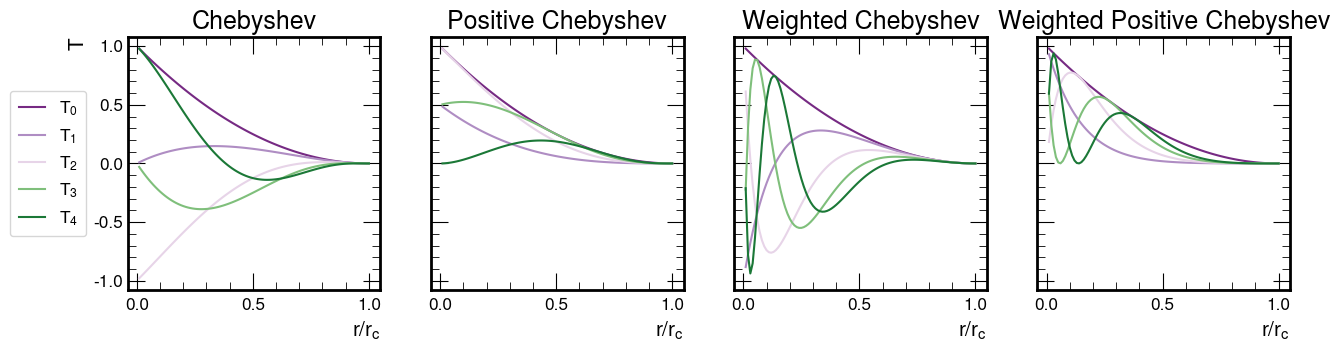

In [461]:
functions = [chebyshev, positive_chebyshev, weighted_chebyshev, weighted_positive_chebyshev]
titles = ['Chebyshev', 'Positive Chebyshev', 'Weighted Chebyshev', 'Weighted Positive Chebyshev']
radial_hyps = [0, 1, 5]
plot_all(functions, titles, radial_hyps, True, '../Figures/cheby.png')

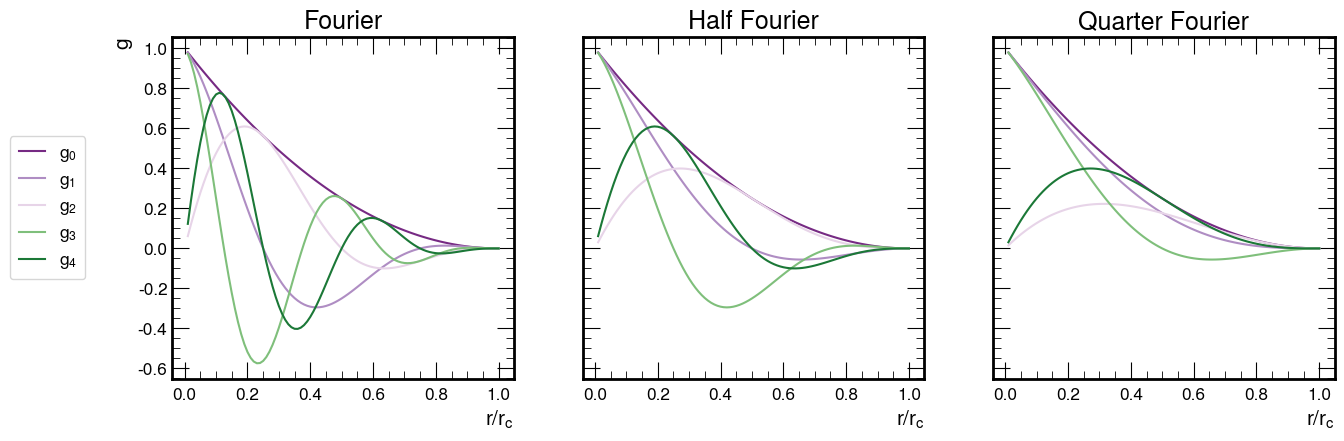

In [455]:
functions = [fourier, fourier_half, fourier_quarter]
titles = ['Fourier', 'Half Fourier', 'Quarter Fourier']
radial_hyps = [0, 1, 2]
plot_all(functions, titles, radial_hyps, True, '../Figures/fourier.png')

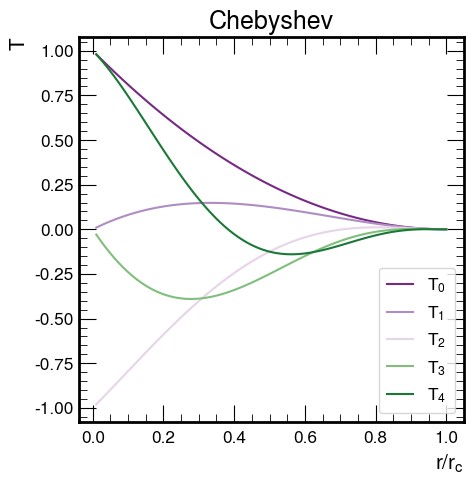

In [465]:

colors = ['#762a83', '#af8dc3', '#e7d4e8', '#7fbf7b', '#1b7837' ]

xarr, basis_vals, rcut_vals = compute_basis(100, 5, 1, chebyshev, radial_hyps)
_, ax = plt.subplots(1, 1, sharey=True, figsize = (5, 5))
for i, c in zip(np.arange(0, 5), colors ):
    ax.plot(xarr, basis_vals[i,:]*rcut_vals[0,:], label = '$T_%s$'%(i), color = c)
    ax.set_title('Chebyshev')
    ax.set_xlabel('$r/r_c$')
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
        
    
ax.legend(loc='lower right', ncol=1, frameon=True)
ax.set_ylabel('T') 
plt.savefig('../Figures/chebyshev.png')
plt.show()

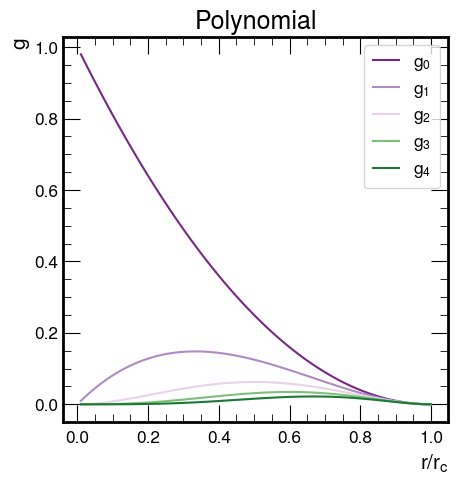

In [446]:

colors = ['#762a83', '#af8dc3', '#e7d4e8', '#7fbf7b', '#1b7837' ]

xarr, basis_vals, rcut_vals = compute_basis(100, 100, 1, poly, radial_hyps)
_, ax = plt.subplots(1, 1, sharey=True, figsize = (5, 5))
for i, c in zip(np.arange(0, 5), colors ):
    ax.plot(xarr, basis_vals[i,:]*rcut_vals[0,:], label = '$g_%s$'%(i), color = c)
    ax.set_title('Polynomial')
    ax.set_xlabel('$r/r_c$')
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
        
    
ax.legend(loc='upper right', ncol=1, frameon=True)
ax.set_ylabel('g') 
plt.savefig('../Figures/poly.png')
plt.show()